In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
data = pd.read_csv('https://github.com/genzj/data-visualization-course/raw/master/data/bike-sharing-demand/train.csv', parse_dates=[0])
print(data.dtypes)
data.head()

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 关系探索

温度、天气、季节等气候条件和骑行数之间有怎样的关系？

[relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

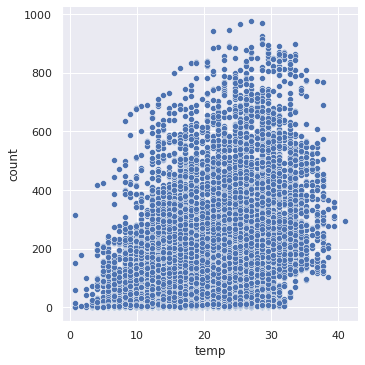

In [4]:
sns.relplot(x='temp', y='count', data=data)

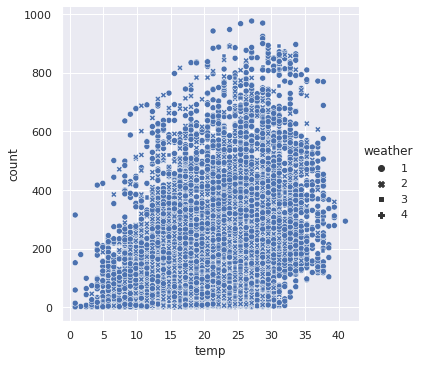

In [5]:
sns.relplot(x='temp', y='count', data=data, style='weather')

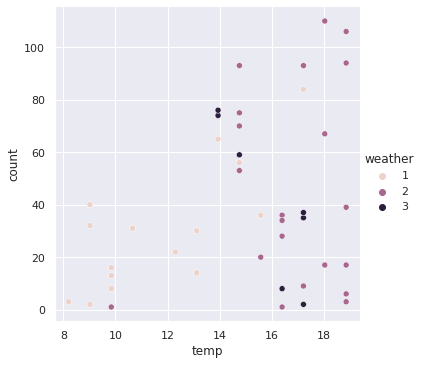

In [6]:
sns.relplot(x='temp', y='count', data=data[:45], hue='weather')

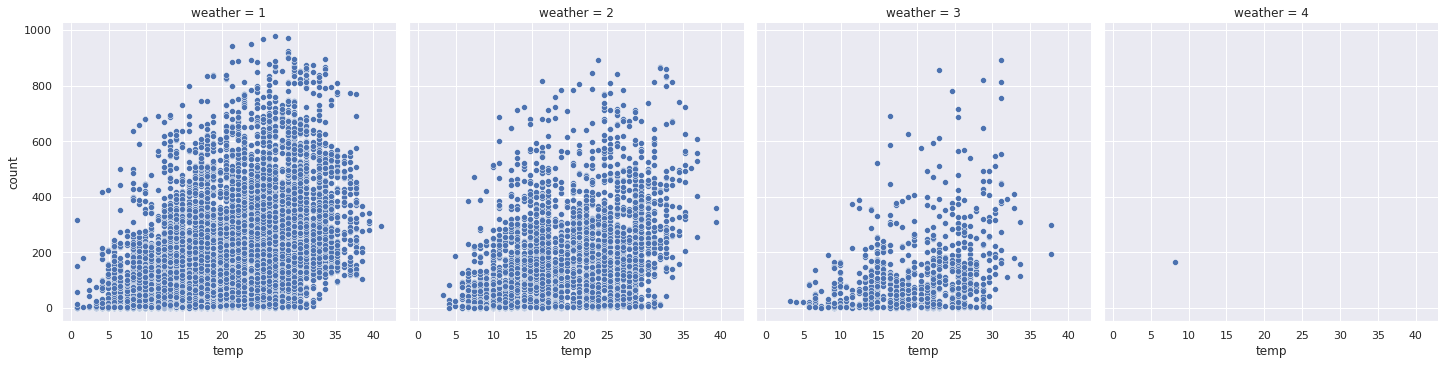

In [7]:
sns.relplot(x='temp', y='count', col='weather', data=data)

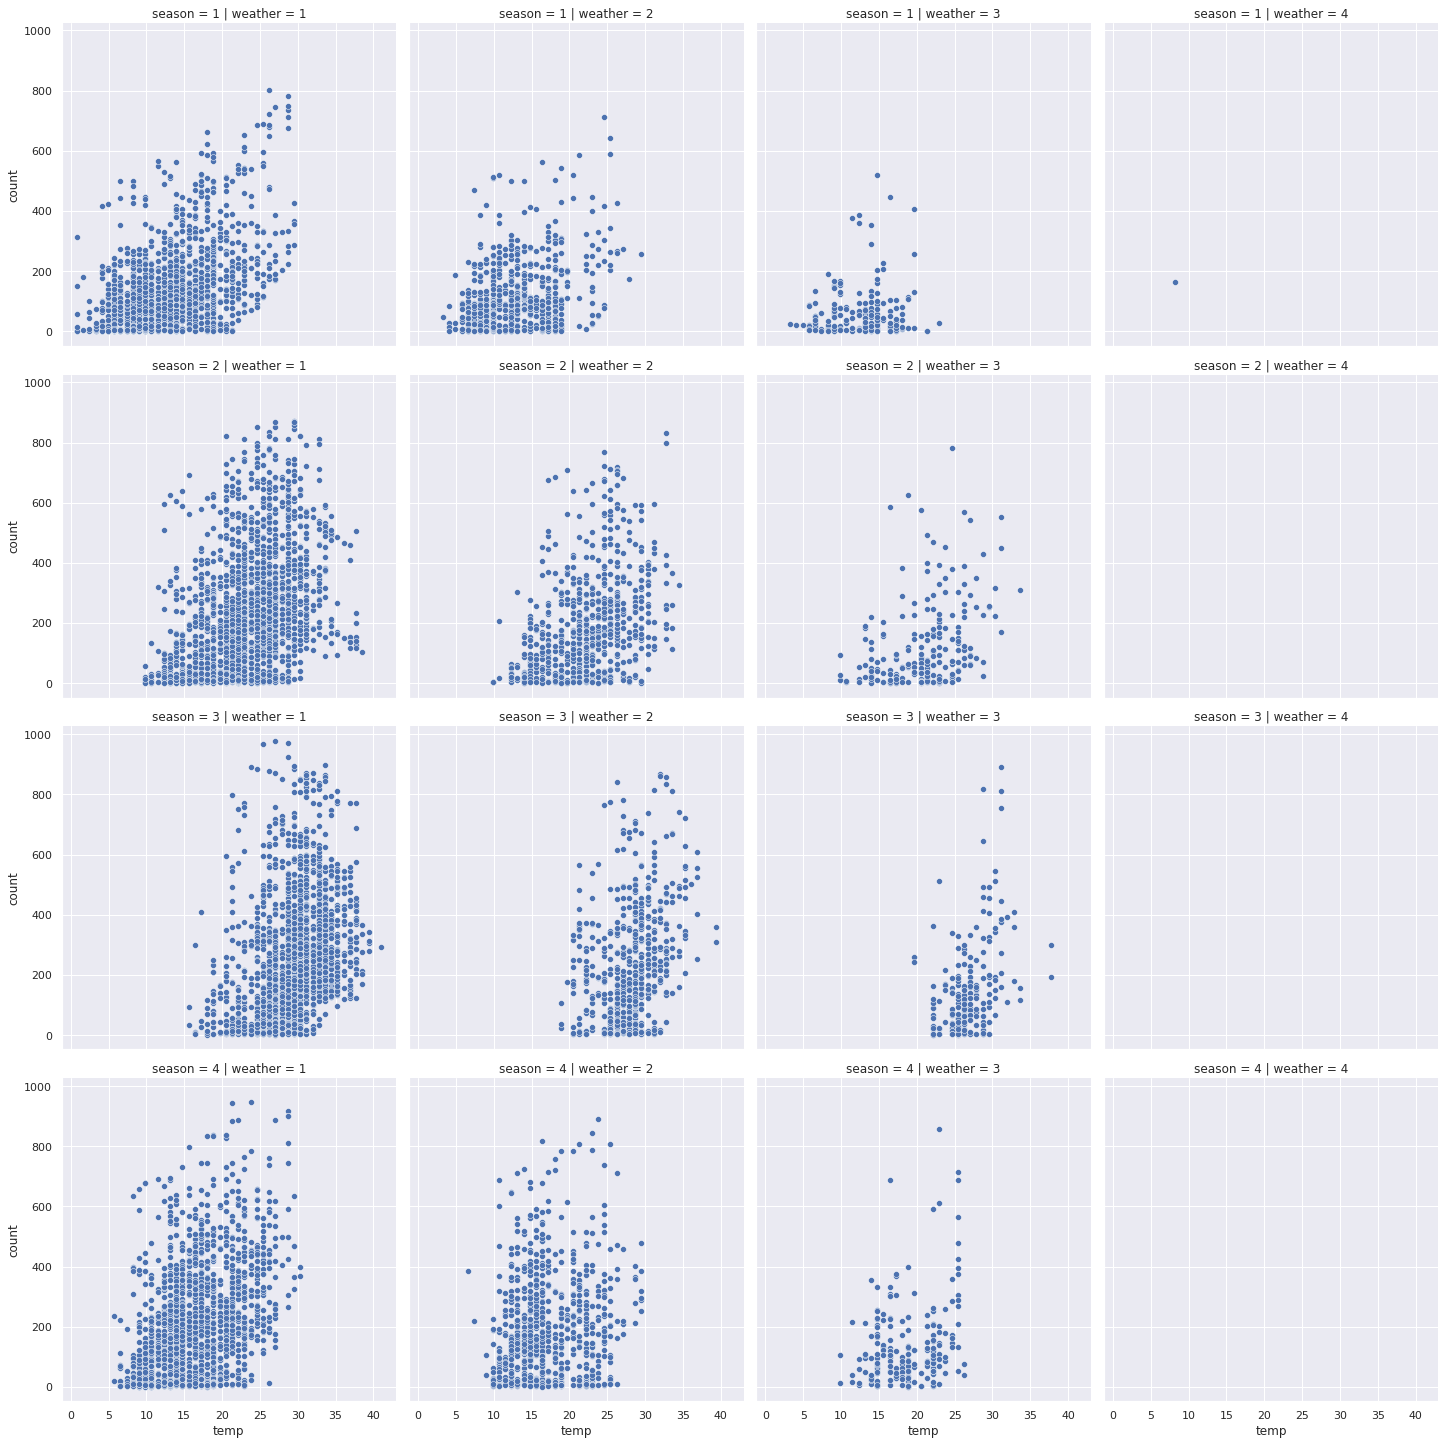

In [8]:
sns.relplot(x='temp', y='count', col='weather', row='season', data=data)

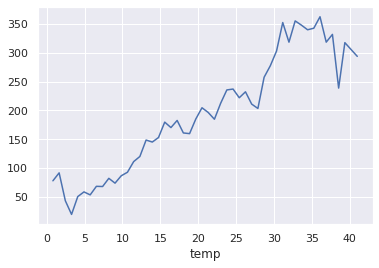

In [9]:
data.groupby('temp')['count'].mean().plot()

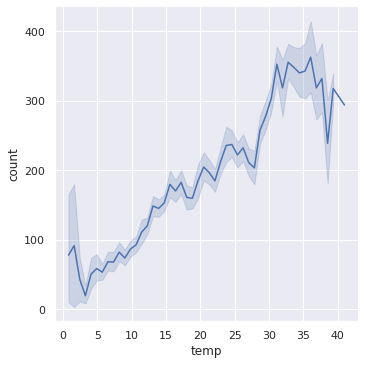

In [10]:
sns.relplot(x='temp', y='count', data=data, kind='line')

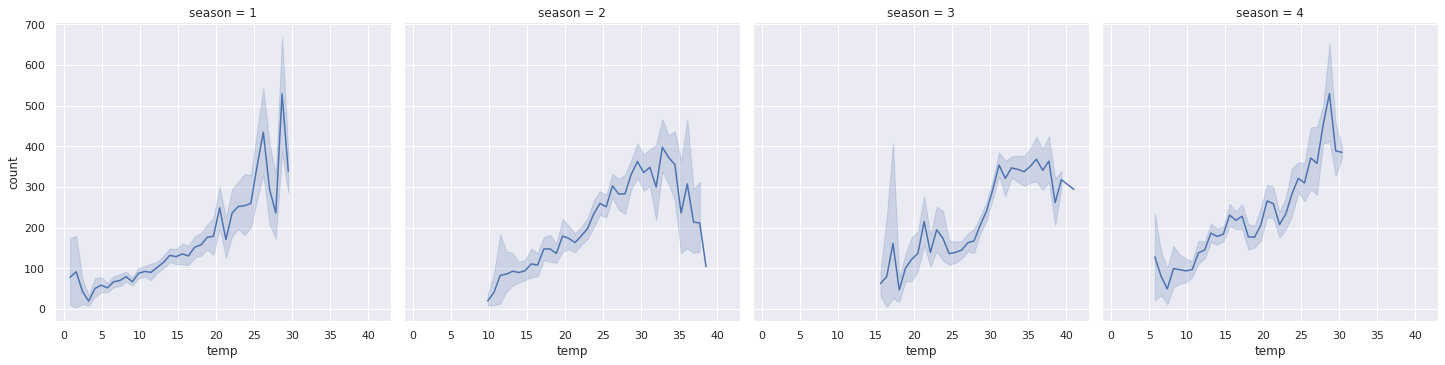

In [11]:
sns.relplot(x='temp', y='count', data=data, kind='line', col='season')

### 离散数据相关性研究

每个season ID分别代表了哪个季节？

[catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

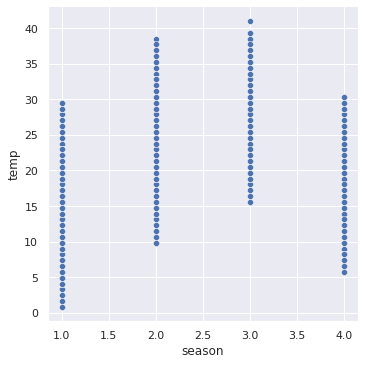

In [12]:
sns.relplot(data=data, x='season', y='temp')

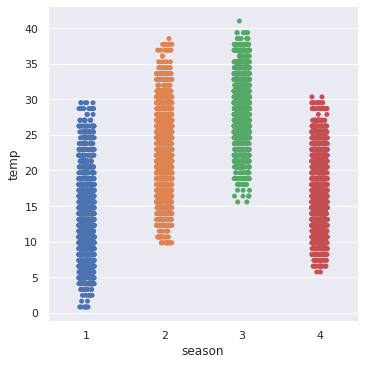

In [13]:
sns.catplot(data=data, x='season', y='temp')

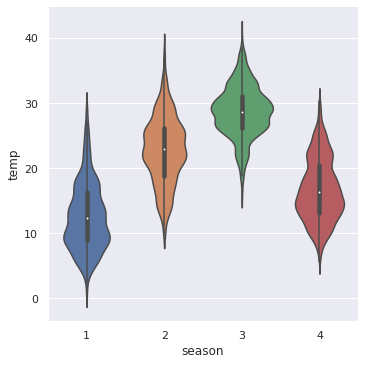

In [14]:
sns.catplot(data=data, x='season', y='temp', kind='violin')

### 单变量分布研究

每小时骑行数量是如何分布的？

[displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

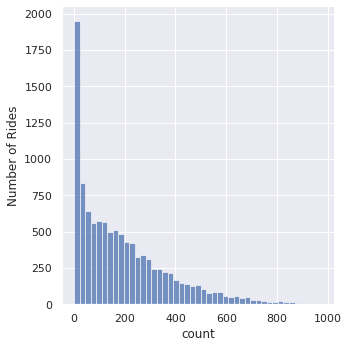

In [15]:
sns.displot(data, x='count')
plt.ylabel('Number of Rides')
plt.show()

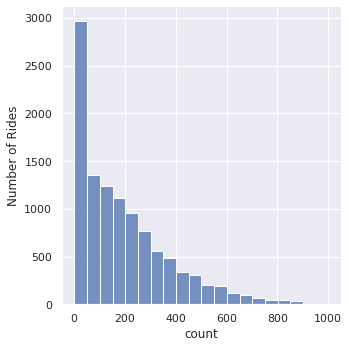

In [16]:
sns.displot(data, x='count', binwidth=50)
plt.ylabel('Number of Rides')
plt.show()

### 多变量分布研究

不同天气情况下，每小时骑行数有何变化？

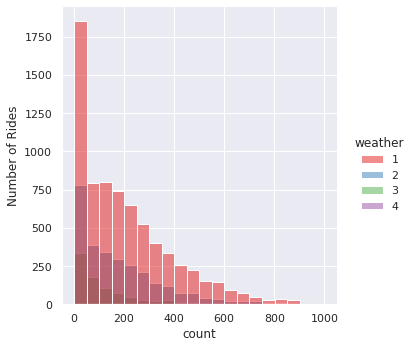

In [17]:
sns.displot(data, x='count', binwidth=50, hue='weather', palette='Set1')
plt.ylabel('Number of Rides')
plt.show()

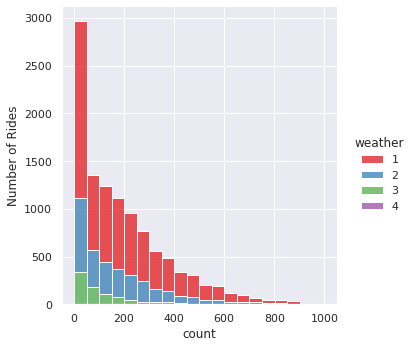

In [18]:
sns.displot(data, x='count', binwidth=50, hue='weather', palette='Set1', multiple='stack')
plt.ylabel('Number of Rides')
plt.show()

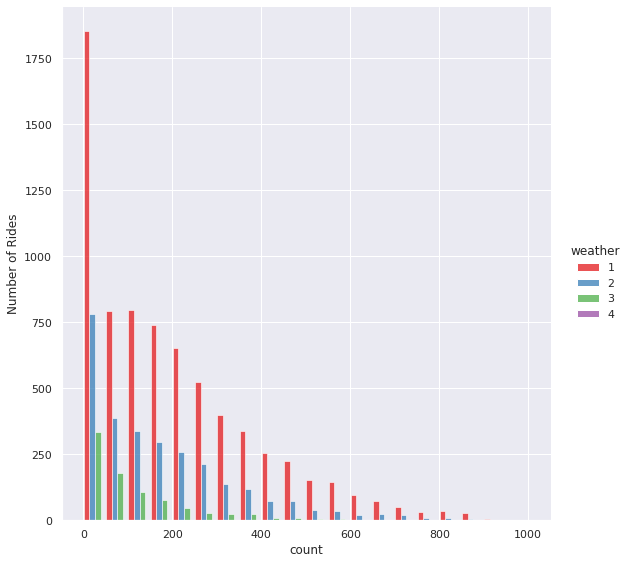

In [19]:
sns.displot(data, x='count', binwidth=50, hue='weather', palette='Set1', multiple='dodge', height=8)
plt.ylabel('Number of Rides')
plt.show()

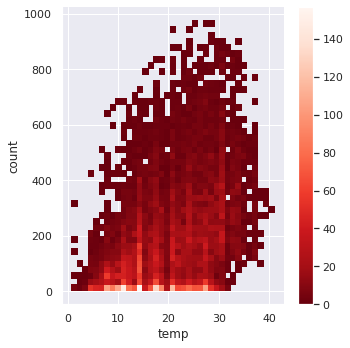

In [20]:
sns.displot(data, x='temp', y='count', cbar=True, cmap='Reds_r')

### 多图网格——联合图

如何同时探索分布和关联？

[jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)

[JointGrid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)


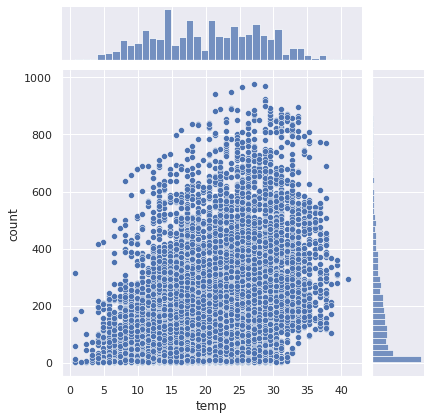

In [21]:
sns.jointplot(data=data, x='temp', y='count')

加入季节因素

![figure1](https://github.com/genzj/data-visualization-course/raw/master/ch03-bike-sharing/fig1.png)

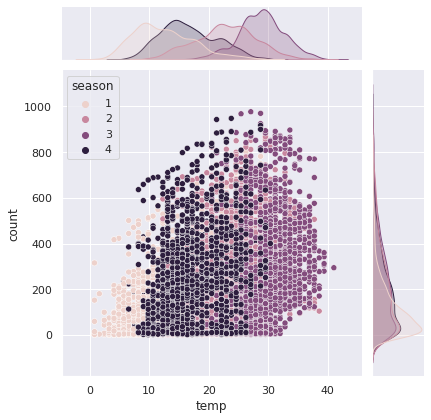

In [22]:
sns.jointplot(data=data, x='temp', y='count', hue='season')

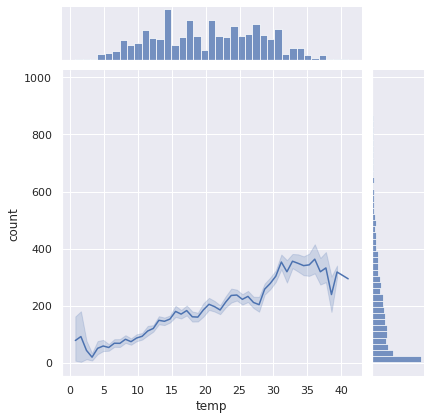

In [23]:
g = sns.JointGrid(data=data, x="temp", y="count")
g.plot_joint(sns.lineplot)
g.plot_marginals(sns.histplot)

### 多图网格——配对图

在变量数目较多时，如何快速探索两两之间的关系？

[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)

[PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)

In [24]:
subframe = data[['season', 'temp', 'count', 'humidity']]

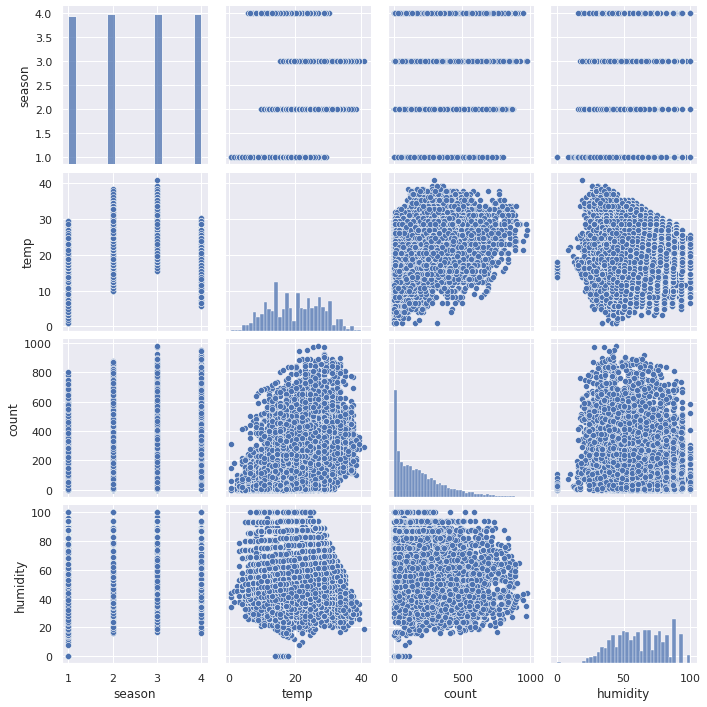

In [25]:
sns.pairplot(subframe)

加入季节因素

![figure2](https://github.com/genzj/data-visualization-course/raw/master/ch03-bike-sharing/fig2.png)

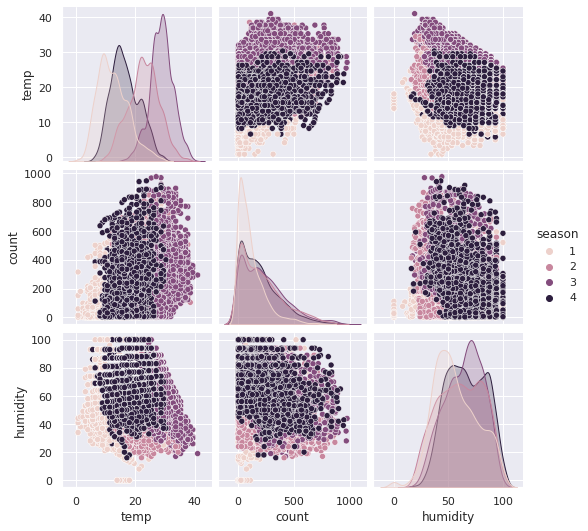

In [26]:
sns.pairplot(subframe, hue='season')

使用
[PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)进一步定制

![figure3](https://github.com/genzj/data-visualization-course/raw/master/ch03-bike-sharing/fig3.png)

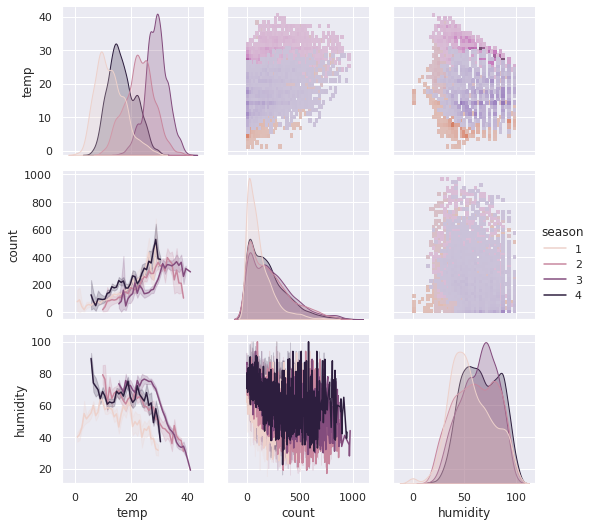

In [27]:
g = sns.PairGrid(subframe, hue='season', diag_sharey=False)
g.map_upper(sns.histplot)
g.map_lower(sns.lineplot)
g.map_diag(sns.kdeplot, fill=True)
g.add_legend()
plt.show()